Nama : Wendy Hendiana Putra<br>
Nim : 221351154 <br>
Kelas : Pagi C

# import library

In [1]:
# import library yang dibutuhkan di sini
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# load dataset

In [2]:
# load dataset mall-customers-data
df = pd.read_csv("mall-customers-data.csv")

# data preprocessing

In [3]:
# Pilih fitur age, annual_income, spending_score untuk clustering
features = ["age",
            "annual_income",
            "spending_score"]

# setelah pilih fitur lahukan standarisasi data sebagai inputan cluster
scaler = StandardScaler()
scale_features = scaler.fit_transform(df[features])

In [4]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scale_features)
    inertia.append(kmeans.inertia_)

# K-means Clustering

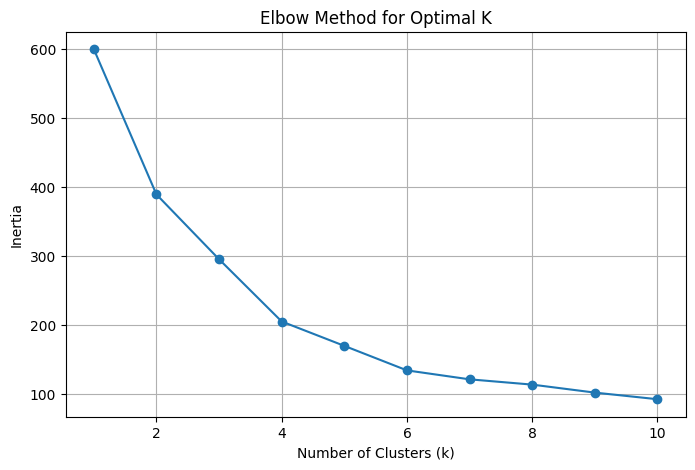

In [5]:
# buatkan plot elbow dan temukan cluster optimal
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [6]:
# buatkan model k-means sesuai jumlah cluster optimal
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Kmeans'] = kmeans.fit_predict(scale_features)

In [7]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scale_features)

In [8]:
df.head()

,customer_id,gender,age,annual_income,spending_score,Kmeans
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


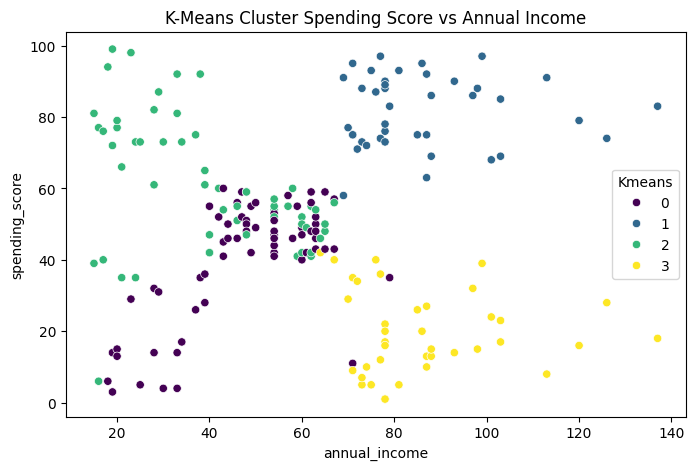

In [9]:
# buatkan profiling menggunakan scater plot dan berikan penjelasannya
# Scatter Plot Cluster antara Spending score dengan Annual Income
plt.figure(figsize=(8,5))
sns.scatterplot(x='annual_income', y='spending_score', hue='Kmeans', data=df, palette='viridis')
plt.title("K-Means Cluster Spending Score vs Annual Income")
plt.show()

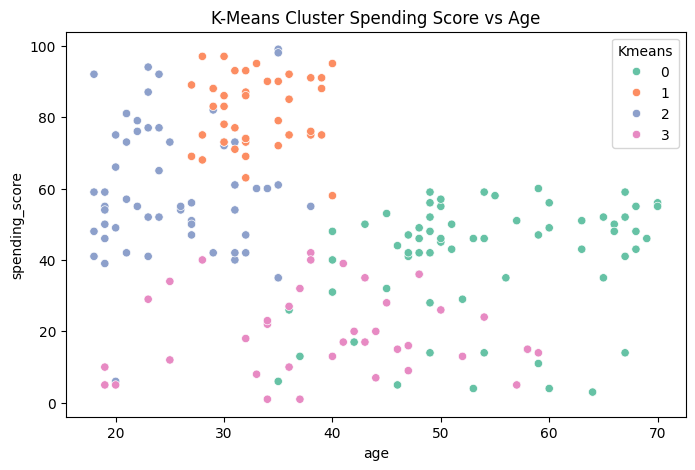

In [10]:
# Scatter Plot Cluster K-Means antara Spending score dengan Age
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='spending_score', hue='Kmeans', data=df,palette='Set2')
plt.title("K-Means Cluster Spending Score vs Age")
plt.show()

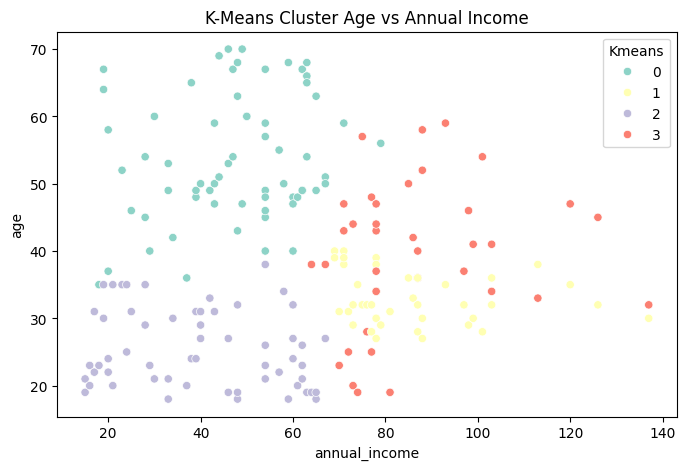

In [11]:
# Scatter Plot Cluster K-Means antara Age dan annual_incomes
plt.figure(figsize=(8,5))
sns.scatterplot(x='annual_income', y='age', hue='Kmeans', data=df,palette='Set3')
plt.title("K-Means Cluster Age vs Annual Income")
plt.show()

# Hierarchical Clustering

In [12]:
# buatkan plot dendogram dan temukan cluster optimal
linked =linkage(scale_features, method='ward')

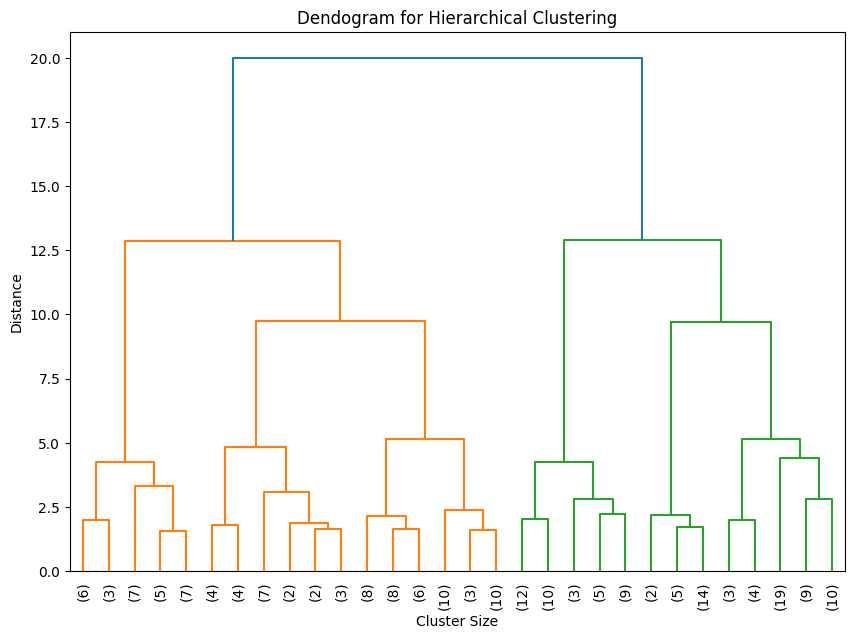

In [13]:

plt.figure(figsize=(10,7))
plt.title("Dendogram for Hierarchical Clustering")
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [14]:
# buatkan model Hierarchical CLustering sesuai jumlah cluster optimal
cluster_labels = cut_tree(linked, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [15]:
df['HC'] = cluster_labels
df.head()

,customer_id,gender,age,annual_income,spending_score,Kmeans,HC
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,0


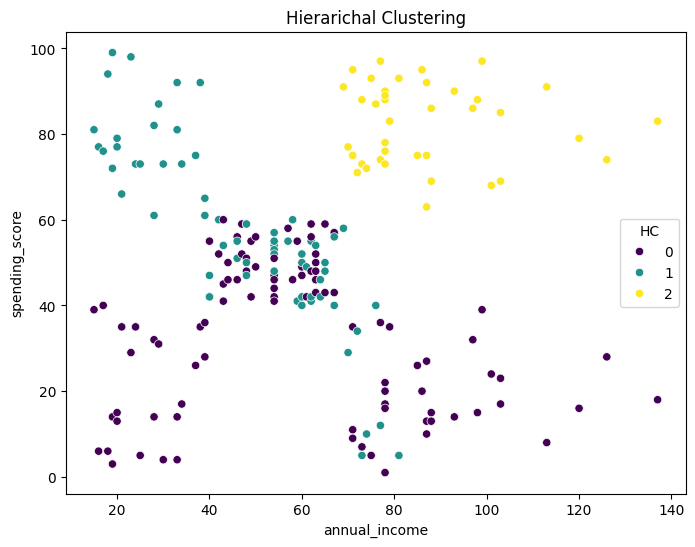

In [16]:
# buatkan profiling menggunakan scater plot dan berikan penjelasannya
plt.figure(figsize=(8,6))
sns.scatterplot(x='annual_income', y='spending_score', hue='HC', data=df, palette='viridis')
plt.title("Hierarichal Clustering")
plt.show()


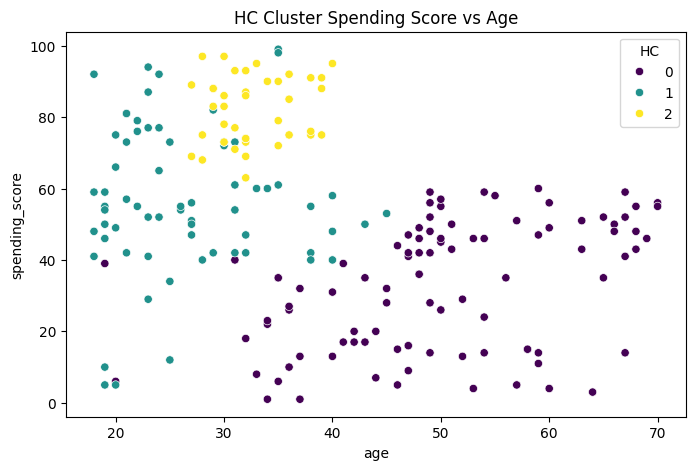

In [17]:
# Scatter Plot Cluster HC antara Spending score dengan Age
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='spending_score', hue='HC', data=df, palette='viridis')
plt.title("HC Cluster Spending Score vs Age")
plt.show()

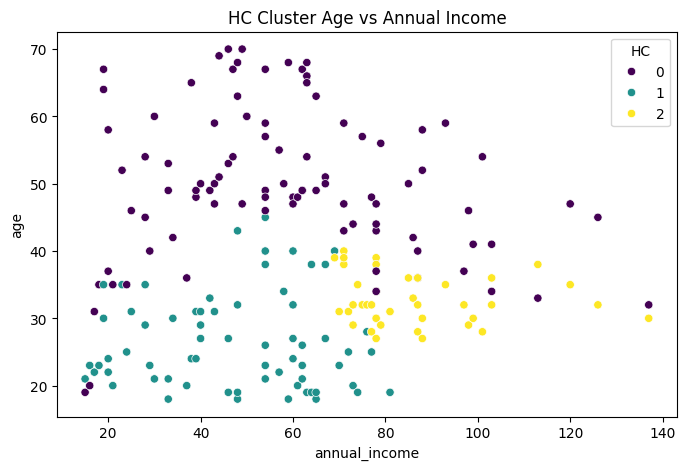

In [18]:
# Scatter Plot Cluster HC antara Age dengan Annual Income
plt.figure(figsize=(8,5))
sns.scatterplot(x='annual_income', y='age', hue='HC', data=df, palette='viridis')
plt.title("HC Cluster Age vs Annual Income")
plt.show()

# DBSCAN

In [19]:
# buatkan model DBSCAN dengan nilai eps=0.5 dan min_samples=6
dbscan = DBSCAN(eps=0.5, min_samples=6)
df['dbscan'] = dbscan.fit_predict(scale_features)

In [20]:
df.head()

,customer_id,gender,age,annual_income,spending_score,Kmeans,HC,dbscan
0,1,Male,19,15,39,2,0,-1
1,2,Male,21,15,81,2,1,0
2,3,Female,20,16,6,2,0,-1
3,4,Female,23,16,77,2,1,0
4,5,Female,31,17,40,2,0,-1


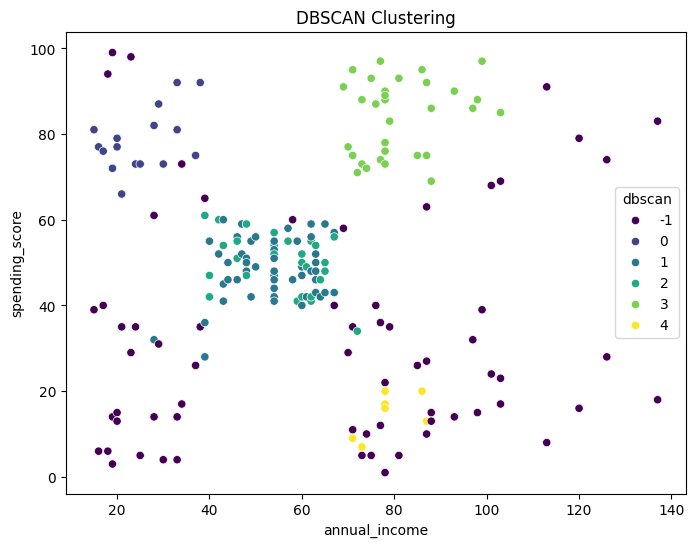

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='annual_income', y='spending_score', hue='dbscan', data=df, palette='viridis')
plt.title("DBSCAN Clustering")
plt.show()

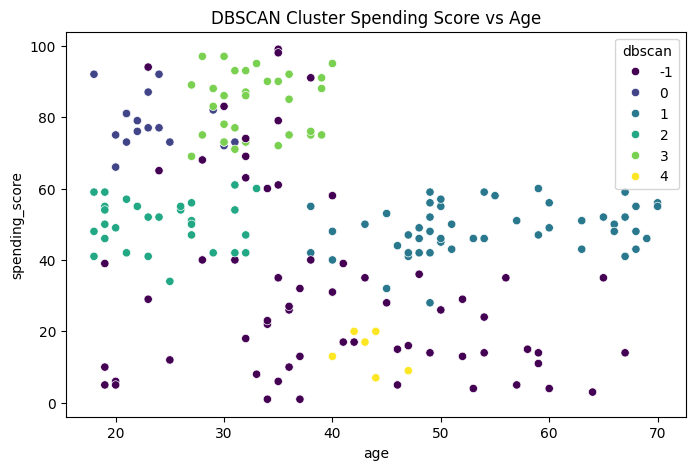

In [22]:
# Scatter Plot Cluster DBSCAN antara Spending score dengan Age
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='spending_score', hue='dbscan', data=df, palette='viridis')
plt.title("DBSCAN Cluster Spending Score vs Age")
plt.show()

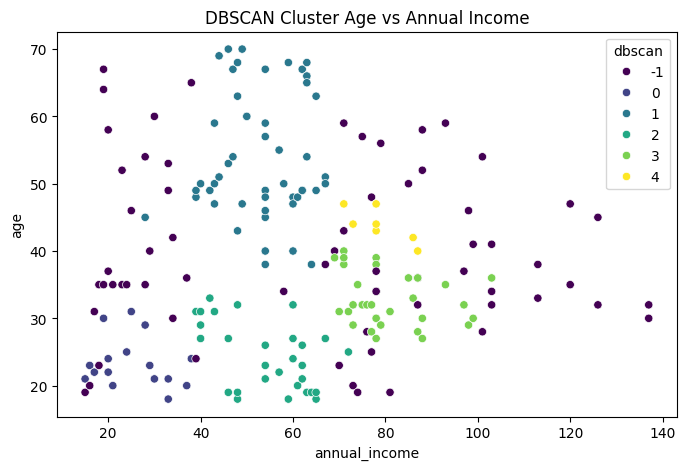

In [23]:
# Scatter Plot Cluster DBSCAN antara Age dengan Annual Income
plt.figure(figsize=(8,5))
sns.scatterplot(x='annual_income', y='age', hue='dbscan', data=df, palette='viridis')
plt.title("DBSCAN Cluster Age vs Annual Income")
plt.show()

In [24]:
# buatkan kolom untuk memisahkan data anomaly atau bukan anomaly dan buatkan plotnya
df['anomaly'] = df['dbscan'] == -1
df.head()

,customer_id,gender,age,annual_income,spending_score,Kmeans,HC,dbscan,anomaly
0,1,Male,19,15,39,2,0,-1,True
1,2,Male,21,15,81,2,1,0,False
2,3,Female,20,16,6,2,0,-1,True
3,4,Female,23,16,77,2,1,0,False
4,5,Female,31,17,40,2,0,-1,True


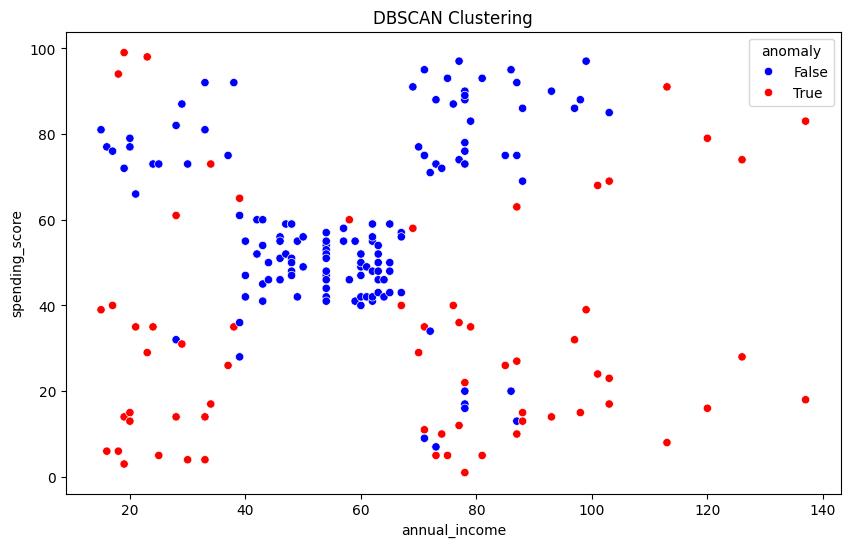

In [25]:
# buatkan profiling menggunakan scater plot dan berikan penjelasannya
plt.figure(figsize=(10,6))
sns.scatterplot(x='annual_income', y='spending_score', hue='anomaly', data=df, palette=['blue', 'red'])
plt.title("DBSCAN Clustering")
plt.show()
